In [1]:
'''
Analysis for "Technical considerations of MSK femoral cartilage segmentation using CNNs"

@author: Arjun Desai, Stanford University
         (c) Stanford University, 2018
'''

import sys
sys.path.insert(0, '../')

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
fsize = 12
params = {'legend.fontsize': fsize*0.925,          
          'axes.labelsize': fsize,
          'axes.titlesize':fsize*1.25,
          'xtick.labelsize':fsize*0.925,
          'ytick.labelsize':fsize*0.925 }
sns.set(palette='pastel', rc=params)


import os
import numpy as np
import scipy.io as sio

import seaborn as sns

import utils
from analysis import analysis_funcs as af
from analysis import stats
from analysis import exp_filepaths as ef

/home/arjundd/anaconda3/envs/tf_36/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# Define filepaths from central filepath
ARCH_UNET = ef.ARCH_UNET
ARCH_SEGNET = ef.ARCH_SEGNET
ARCH_DEEPLAB = ef.ARCH_DEEPLAB

# loss functions experiments
LOSS_DSC = ef.LOSS_DSC
LOSS_WCE = ef.LOSS_WCE
LOSS_BCE = ef.LOSS_BCE
LOSS_FOCAL = ef.LOSS_FOCAL

# augmentation experiments
AUG_YES = ef.AUG_YES
AUG_NO = ef.AUG_NO

# volumetric architecture experiments
VOLUME_2D = ef.VOLUME_2D
VOLUME_2_5D_3 = ef.VOLUME_2_5D_3
VOLUME_2_5D_5 = ef.VOLUME_2_5D_5
VOLUME_2_5D_7 = ef.VOLUME_2_5D_7
VOLUME_3D = ef.VOLUME_3D

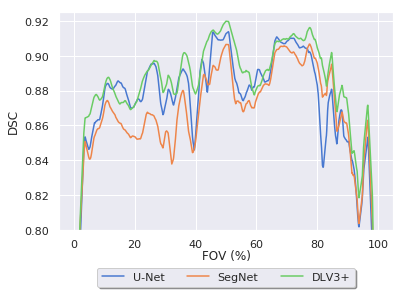

DSC
F-value: 5.1382
p-value: 0.0766

VOE
F-value: 5.1750
p-value: 0.0752

CV
F-value: 0.4128
p-value: 0.8135



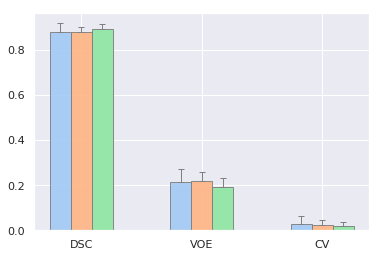

In [3]:
# Architecture result paths
ARCHS = {'filename': 'architecture',
         'keys': ['U-Net', 'SegNet', 'DLV3+'],
         'U-Net': ARCH_UNET, 'SegNet': ARCH_SEGNET, 'DLV3+': ARCH_DEEPLAB}
af.graph_slice_exp(ARCHS, True, title='', show_error=False, ylim=[0.8, 0.925])

stats.kruskal_dunn_analysis([ARCH_UNET, ARCH_SEGNET, ARCH_DEEPLAB], ARCHS['keys'], 'stats-arch')
stats.compare_metrics_v2([ARCH_UNET, ARCH_SEGNET, ARCH_DEEPLAB], ARCHS['keys'], 'stats-arch')

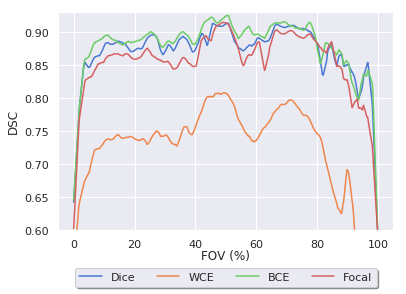

DSC
F-value: 66.3728
p-value: 0.0000
Dunn: 
               Dice           WCE           BCE         Focal
Dice  -1.000000e+00  3.140673e-10  1.000000e+00  1.000000e+00
WCE    3.140673e-10 -1.000000e+00  7.355741e-13  9.164163e-07
BCE    1.000000e+00  7.355741e-13 -1.000000e+00  1.824567e-01
Focal  1.000000e+00  9.164163e-07  1.824567e-01 -1.000000e+00

VOE
F-value: 66.3521
p-value: 0.0000
Dunn: 
               Dice           WCE           BCE         Focal
Dice  -1.000000e+00  2.982488e-10  1.000000e+00  1.000000e+00
WCE    2.982488e-10 -1.000000e+00  7.741277e-13  9.288511e-07
BCE    1.000000e+00  7.741277e-13 -1.000000e+00  1.844387e-01
Focal  1.000000e+00  9.288511e-07  1.844387e-01 -1.000000e+00

CV
F-value: 62.6944
p-value: 0.0000
Dunn: 
               Dice           WCE           BCE         Focal
Dice  -1.000000e+00  3.087408e-10  1.000000e+00  1.000000e+00
WCE    3.087408e-10 -1.000000e+00  3.801589e-09  2.276021e-10
BCE    1.000000e+00  3.801589e-09 -1.000000e+00  1.000000e+00

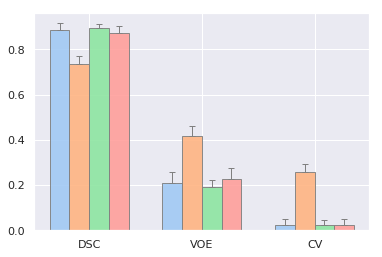

In [4]:
# Loss function result paths
LOSSES = {'filename': 'losses',
          'keys': ['Dice', 'WCE', 'BCE', 'Focal'],
          'Dice': LOSS_DSC, 'WCE': LOSS_WCE, 'BCE': LOSS_BCE, 'Focal': LOSS_FOCAL}
af.graph_slice_exp(LOSSES, True, title='', show_error=False, ylim=[0.60, 0.93])

stats.kruskal_dunn_analysis([LOSS_DSC, LOSS_WCE, LOSS_BCE, LOSS_FOCAL], LOSSES['keys'], 'stats-loss')
stats.compare_metrics_v2([LOSS_DSC, LOSS_WCE, LOSS_BCE, LOSS_FOCAL], LOSSES['keys'], 'stats-loss')

DSC
F-value: 19.7298
p-value: 0.0000
Dunn: 
               Non-Augmented  Augmented
Non-Augmented      -1.000000   0.000009
Augmented           0.000009  -1.000000

VOE
F-value: 19.7972
p-value: 0.0000
Dunn: 
               Non-Augmented  Augmented
Non-Augmented      -1.000000   0.000009
Augmented           0.000009  -1.000000

CV
F-value: 8.6110
p-value: 0.0033
Dunn: 
               Non-Augmented  Augmented
Non-Augmented      -1.000000   0.003341
Augmented           0.003341  -1.000000



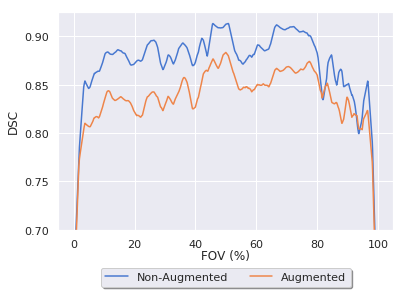

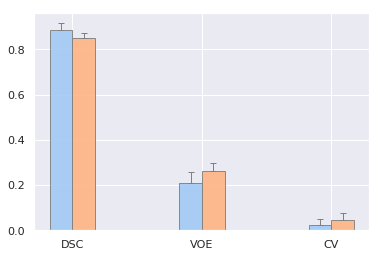

In [5]:
# Augmentation results
# Augmentation result paths
AUGS = {'filename': 'augment',
        'keys': ['Non-Augmented', 'Augmented'],
        'Augmented': AUG_YES, 'Non-Augmented': AUG_NO}

af.graph_slice_exp(AUGS, title='', show_error=False, ylim=[0.70, 0.925])

stats.kruskal_dunn_analysis([AUG_NO, AUG_YES], AUGS['keys'], 'stats-aug')
stats.compare_metrics_v2([AUG_NO, AUG_YES], AUGS['keys'], 'stats-aug')

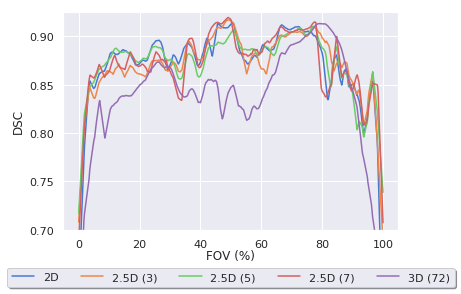

DSC
F-value: 11.6080
p-value: 0.0205
Dunn: 
                2D  2.5D (3)  2.5D (5)  2.5D (7)   3D (72)
2D       -1.000000  1.000000  1.000000  1.000000  0.015228
2.5D (3)  1.000000 -1.000000  1.000000  1.000000  0.767776
2.5D (5)  1.000000  1.000000 -1.000000  1.000000  0.146736
2.5D (7)  1.000000  1.000000  1.000000 -1.000000  0.146736
3D (72)   0.015228  0.767776  0.146736  0.146736 -1.000000

VOE
F-value: 11.6400
p-value: 0.0202
Dunn: 
                2D  2.5D (3)  2.5D (5)  2.5D (7)   3D (72)
2D       -1.000000   1.00000   1.00000  1.000000  0.014654
2.5D (3)  1.000000  -1.00000   1.00000  1.000000  0.749090
2.5D (5)  1.000000   1.00000  -1.00000  1.000000  0.150920
2.5D (7)  1.000000   1.00000   1.00000 -1.000000  0.145519
3D (72)   0.014654   0.74909   0.15092  0.145519 -1.000000

CV
F-value: 0.4093
p-value: 0.9817



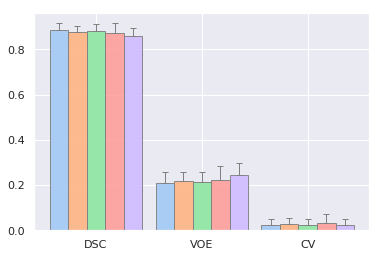

In [6]:
# TODO: inspect training/testing

VOLUMES = {'filename': 'volume',
         'keys': ['2D', '2.5D (3)', '2.5D (5)', '2.5D (7)', '3D (72)'],
         '2D': VOLUME_2D, '2.5D (3)': VOLUME_2_5D_3, '2.5D (5)': VOLUME_2_5D_5, '2.5D (7)': VOLUME_2_5D_7, '3D (72)': VOLUME_3D}

af.graph_slice_exp(VOLUMES, True, title='', show_error=False, ylim=[0.70, 0.925])
stats.kruskal_dunn_analysis([VOLUME_2D, VOLUME_2_5D_3, VOLUME_2_5D_5, VOLUME_2_5D_7, VOLUME_3D], VOLUMES['keys'], 'stats-volume')
stats.compare_metrics_v2([VOLUME_2D, VOLUME_2_5D_3, VOLUME_2_5D_5, VOLUME_2_5D_7, VOLUME_3D], VOLUMES['keys'], 'stats-volume')

In [7]:
# print metrics summary
af.print_metrics_summary([ARCH_UNET, ARCH_SEGNET, ARCH_DEEPLAB])
af.print_metrics_summary([LOSS_DSC, LOSS_BCE, LOSS_WCE, LOSS_FOCAL])
af.print_metrics_summary([AUG_NO, AUG_YES])
af.print_metrics_summary([VOLUME_2D, VOLUME_2_5D_3, VOLUME_2_5D_5, VOLUME_2_5D_7, VOLUME_3D])


/bmrNAS/people/arjun/msk_seg_networks/augment_limited/unet_2d/2018-11-07-16-05-15/fine_tune/test_results
--------------------------------------------------------------------------------
DSC - Mean +/- Std, Median = 0.8791 +/- 0.039, 0.8947
VOE - Mean +/- Std, Median = 0.2136 +/- 0.059, 0.1906
CV - Mean +/- Std, Median = 0.0292 +/- 0.032, 0.0199
TP - Mean +/- Std, Median = 71608.5714 +/- 13838.747, 69895.5000
FN - Mean +/- Std, Median = 9446.4643 +/- 3125.898, 8974.0000
FP - Mean +/- Std, Median = 9699.5357 +/- 5235.446, 8555.5000

/bmrNAS/people/arjun/msk_seg_networks/architecture_limit/segnet_2d/2018-11-30-21-13-14/fine_tune/test_results
--------------------------------------------------------------------------------
DSC - Mean +/- Std, Median = 0.8773 +/- 0.026, 0.8815
VOE - Mean +/- Std, Median = 0.2176 +/- 0.040, 0.2118
CV - Mean +/- Std, Median = 0.0243 +/- 0.021, 0.0198
TP - Mean +/- Std, Median = 71115.9286 +/- 13379.697, 67512.0000
FN - Mean +/- Std, Median = 9939.1071 +/- 332